# MatplotQuiz1

In [1]:
# 쥬피터노트북 셀 스타일 조절 
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')



In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib
# matplotlib의 pyplot을 사용한다.
import matplotlib.pyplot as plt

# 매직 명령어 => jupyter notebook에서 그래프 삽입 기능 
%matplotlib inline
# 관련 라이브러리 임포트 
# 한글이 깨져 나오는것을 방지하기위해서 
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

#  한글글꼴로 변경
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
# 한글 폰트 지정 
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.style.use('ggplot')

# Quiz2
1) gapminder.tsv 파일을 데이타프레임을 생성하여라 
2) 'year' 컬럼을 '년도-01-01' 형태로 변경하여라 
3) 'year' 컬럼을 시계열 데이타로 형변환하여라 
4) 'year' 컬럼을 이용하여 2002년도 데이타 추출하고 별도의 데이타프레임 'df_gap2002' 으로 설정하여라
5) 4번에서 생성한 df_gap2002 프레임에서 평균수명(lifeExp) 컬럼의 값이 가장 낮은 3개국과 가장 높은 3개국 나라의 
  데이타를 그래프로 출력하여라.
6) 대륙별로 몇개국으로 구성되었는지 그래프로 출력하여라 
7) gdpPercap 컬럼값이 가장 높은 나라의 gdpPercap 데이타를 년도별로 그래프로 출력하여라. 
8) 한국 데이타 프레임 생성 후 아래와 같이 lifeExp, gdpPercap 컬럼의 그래프를 아래와 같은 형태로 출력하여라. 

## 1) gapminder.tsv 파일을 데이타프레임을 생성하여라 

In [17]:
df_gap = pd.read_csv('data/gapminder.tsv', sep='\t')
df_gap

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## 2) 'year' 컬럼을 '년도-01-01' 형태로 변경하여라 

In [18]:
df_gap['year'] = df_gap['year'].apply(lambda x:str(x)+'-01-01')
df_gap['year'].unique()
df_gap.dtypes

country       object
continent     object
year          object
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

## 3) 'year' 컬럼을 시계열 데이타로 형변환하여라

In [19]:
df_gap['year'] = pd.to_datetime(df_gap['year'], format='%Y-%m-%d')
df_gap['year']

0      1952-01-01
1      1957-01-01
2      1962-01-01
3      1967-01-01
4      1972-01-01
          ...    
1699   1987-01-01
1700   1992-01-01
1701   1997-01-01
1702   2002-01-01
1703   2007-01-01
Name: year, Length: 1704, dtype: datetime64[ns]

In [20]:
df_gap.dtypes

country              object
continent            object
year         datetime64[ns]
lifeExp             float64
pop                   int64
gdpPercap           float64
dtype: object

## 4) 'year' 컬럼을 이용하여 2002년도 데이타 추출하고 별도의 데이타프레임 df_gap2002 로 복사하여라. 

In [21]:
df_gap['year']

0      1952-01-01
1      1957-01-01
2      1962-01-01
3      1967-01-01
4      1972-01-01
          ...    
1699   1987-01-01
1700   1992-01-01
1701   1997-01-01
1702   2002-01-01
1703   2007-01-01
Name: year, Length: 1704, dtype: datetime64[ns]

In [22]:
df_gap2002 = df_gap[df_gap['year'] == '2002']
df_gap2002.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1654,Vietnam,Asia,2002-01-01,73.017,80908147,1764.456677
1666,West Bank and Gaza,Asia,2002-01-01,72.370,3389578,4515.487575
1678,"Yemen, Rep.",Asia,2002-01-01,60.308,18701257,2234.820827
1690,Zambia,Africa,2002-01-01,39.193,10595811,1071.613938
1702,Zimbabwe,Africa,2002-01-01,39.989,11926563,672.038623


## 5) 4번에서 생성한 df_gap2002 프레임에서 기대수명(lifeExp) 컬럼의 값이 가장 낮은 3개국과 가장 높은 3개국 나라의 데이타를 그래프로 출력하여라

In [23]:
df_result = df_gap2002.sort_values(by='lifeExp')[['country', 'lifeExp']]
df_result.index

Int64Index([1690, 1702,   46, 1354,   10,  262, 1294,  898, 1462, 1042,
            ...
             766,  250, 1426, 1474,  778,   70,  694, 1486,  670,  802],
           dtype='int64', length=142)

In [24]:
df_result.index[-3:]

Int64Index([1486, 670, 802], dtype='int64')

In [25]:
index_list = list(df_result.index[:3]) + list(df_result.index[-3:])
index_list 

[1690, 1702, 46, 1486, 670, 802]

In [26]:
df_result2 = df_result.loc[index_list]
df_result2

,country,lifeExp
1690,Zambia,39.193
1702,Zimbabwe,39.989
46,Angola,41.003
1486,Switzerland,80.620
670,"Hong Kong, China",81.495
802,Japan,82.000


In [27]:
df_result2.index=df_result2['country']
df_result2

,country,lifeExp
country,,
Zambia,Zambia,39.193
Zimbabwe,Zimbabwe,39.989
Angola,Angola,41.003
Switzerland,Switzerland,80.620
"Hong Kong, China","Hong Kong, China",81.495
Japan,Japan,82.000


In [28]:
df_result2.index=df_result2['country']
df_result2

,country,lifeExp
country,,
Zambia,Zambia,39.193
Zimbabwe,Zimbabwe,39.989
Angola,Angola,41.003
Switzerland,Switzerland,80.620
"Hong Kong, China","Hong Kong, China",81.495
Japan,Japan,82.000


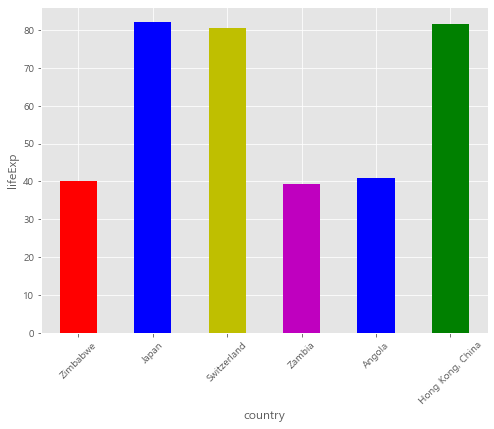

In [29]:
df_result2['lifeExp'].sample(6).plot(kind='bar', figsize=(8,6), ylabel='lifeExp', color=['r','b','y','m','b','g'])
plt.xticks(rotation=45)
plt.show()

## 6) 대륙별로 몇개국으로 구성되었는지 그래프로 출력하라

In [30]:
df_gap['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

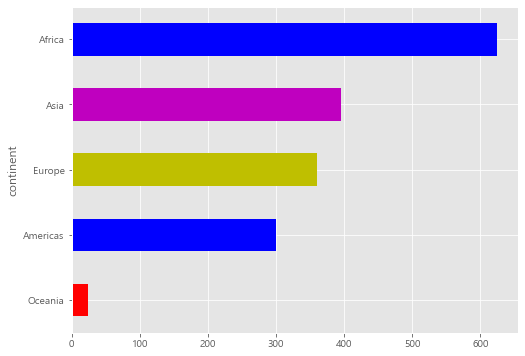

In [31]:
df_gap['continent'].value_counts()[::-1].plot(kind='barh', figsize=(8,6), 
                                        xlabel='continent', 
                                        color=['r','b','y','m','b']);

## 7) gdpPercap 컬럼값이 가장 높은 나라의 데이타를 그래프로 출력하여라. 

In [32]:
county_name = df_gap[df_gap['gdpPercap'] == df_gap['gdpPercap'].max()]['country']
county_name

853    Kuwait
Name: country, dtype: object

In [34]:
df_gap_Kuwait = df_gap[df_gap['country'] == county_name[853]]
df_gap_Kuwait['year'] = df_gap_Kuwait['year'].dt.year
df_gap_Kuwait = df_gap_Kuwait.set_index(df_gap_Kuwait['year'])
df_gap_Kuwait

,country,continent,year,lifeExp,pop,gdpPercap
year,,,,,,
1952,Kuwait,Asia,1952,55.565,160000,108382.35290
1957,Kuwait,Asia,1957,58.033,212846,113523.13290
1962,Kuwait,Asia,1962,60.470,358266,95458.11176
1967,Kuwait,Asia,1967,64.624,575003,80894.88326
1972,Kuwait,Asia,1972,67.712,841934,109347.86700
1977,Kuwait,Asia,1977,69.343,1140357,59265.47714
1982,Kuwait,Asia,1982,71.309,1497494,31354.03573
1987,Kuwait,Asia,1987,74.174,1891487,28118.42998
1992,Kuwait,Asia,1992,75.190,1418095,34932.91959


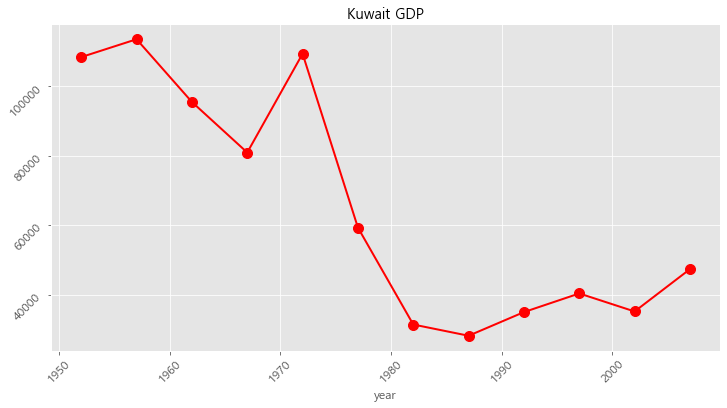

In [35]:
df_gap_Kuwait['gdpPercap'].plot(color='r', linewidth=2, marker='o', markersize=10, grid=True, 
                                figsize=(12,6), xlabel='year', title='Kuwait GDP')
plt.tick_params(labelsize=12, rotation=45)
plt.xticks = list(df_gap_Kuwait.index)

## 8) 한국 데이타 프레임 생성 후 아래와 같이 lifeExp, gdpPercap 컬럼의 그래프를 아래와 같은 형태로 출력하여라. 

In [36]:
# Korea, Rep.        Korea, Dem. Rep.
df_kor = df_gap[df_gap['country'] == 'Korea, Rep.']
df_kor

,country,continent,year,lifeExp,pop,gdpPercap
840,"Korea, Rep.",Asia,1952-01-01,47.453,20947571,1030.592226
841,"Korea, Rep.",Asia,1957-01-01,52.681,22611552,1487.593537
842,"Korea, Rep.",Asia,1962-01-01,55.292,26420307,1536.344387
843,"Korea, Rep.",Asia,1967-01-01,57.716,30131000,2029.228142
844,"Korea, Rep.",Asia,1972-01-01,62.612,33505000,3030.876650
845,"Korea, Rep.",Asia,1977-01-01,64.766,36436000,4657.221020
846,"Korea, Rep.",Asia,1982-01-01,67.123,39326000,5622.942464
847,"Korea, Rep.",Asia,1987-01-01,69.810,41622000,8533.088805
848,"Korea, Rep.",Asia,1992-01-01,72.244,43805450,12104.278720
849,"Korea, Rep.",Asia,1997-01-01,74.647,46173816,15993.527960


In [37]:
df_kor = df_kor.set_index(df_kor['year'])
df_kor

,country,continent,year,lifeExp,pop,gdpPercap
year,,,,,,
1952-01-01,"Korea, Rep.",Asia,1952-01-01,47.453,20947571,1030.592226
1957-01-01,"Korea, Rep.",Asia,1957-01-01,52.681,22611552,1487.593537
1962-01-01,"Korea, Rep.",Asia,1962-01-01,55.292,26420307,1536.344387
1967-01-01,"Korea, Rep.",Asia,1967-01-01,57.716,30131000,2029.228142
1972-01-01,"Korea, Rep.",Asia,1972-01-01,62.612,33505000,3030.876650
1977-01-01,"Korea, Rep.",Asia,1977-01-01,64.766,36436000,4657.221020
1982-01-01,"Korea, Rep.",Asia,1982-01-01,67.123,39326000,5622.942464
1987-01-01,"Korea, Rep.",Asia,1987-01-01,69.810,41622000,8533.088805
1992-01-01,"Korea, Rep.",Asia,1992-01-01,72.244,43805450,12104.278720


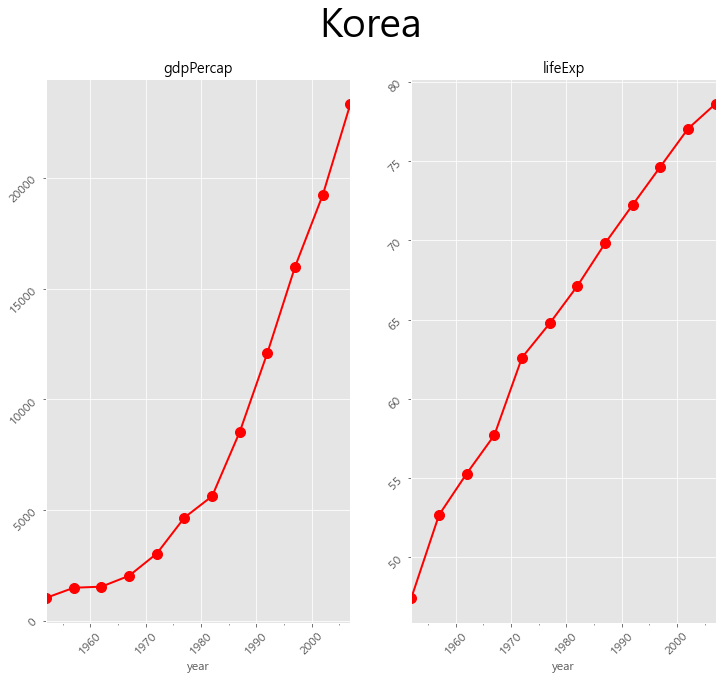

In [38]:
plt.figure(figsize=(12,10))

plt.subplot(121)
df_kor['gdpPercap'].plot(color='r', linewidth=2, marker='o', 
                         markersize=10, grid=True, xlabel='year', title='gdpPercap')
plt.tick_params(labelsize=12, rotation=45)
plt.xticks = list(df_kor.index)

plt.subplot(122)
df_kor['lifeExp'].plot(color='r', linewidth=2, marker='o', markersize=10, grid=True, 
                                xlabel='year', title='lifeExp')
plt.tick_params(labelsize=12, rotation=45)
plt.xticks = list(df_kor.index)

plt.suptitle('Korea', fontsize=40)
plt.show()